In [3]:
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv('BPD_Arrests.csv')

# Fill null values in the "arrestnumber" column with a desired value
df['arrestnumber'].fillna('N/A', inplace=True)

# Alternatively, you can fill null values with the mean of the column:
# df['arrestnumber'].fillna(df['arrestnumber'].mean(), inplace=True)

In [4]:
# Columns to fill null values
columns_to_fill = ['gender', 'race', 'arrestdatetime', 'arrestlocation', 'incidentoffence', 'incidentlocation',
                   'charge', 'chargedescription', 'district', 'post', 'neighborhood', 'latitude', 'longitude',
                   'geolocation', 'incidentnumber', 'objectid']

# Fill null values in the specified columns with a desired value
df[columns_to_fill].fillna('N/A', inplace=True)

<ipython-input-4-faed5997fdb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fill].fillna('N/A', inplace=True)


In [5]:
# Fill null values in the "age" column with the mean value
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

In [6]:
# Check for empty values in the dataset
if df.empty:
    print("The dataset is empty.")
else:
    # Check for empty values in each column
    empty_columns = df.columns[df.isnull().all()]
    if len(empty_columns) > 0:
        print("There are empty values in the following columns:")
        print(empty_columns)
    else:
        print("There are no empty values in the dataset.")

There are no empty values in the dataset.


In [7]:
# Save the modified DataFrame back to a CSV file
df.to_csv('BPD_Arrests_filled.csv', index=True)

In [8]:
print(df.columns)

Index(['arrestnumber', 'age', 'gender', 'race', 'arrestdatetime',
       'arrestlocation', 'incidentoffence', 'incidentlocation', 'charge',
       'chargedescription', 'district', 'post', 'neighborhood', 'latitude',
       'longitude', 'geolocation', 'incidentnumber', 'objectid'],
      dtype='object')


HistGradientBoostingClassifier

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # Enable the HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming your dataset is stored in a variable called 'df'
# Reduce the dataset size by sampling a smaller subset
sample_size = 1000  # Define the desired sample size
df_sample = df.sample(n=sample_size, random_state=42)

# Splitting the sampled dataset into features (X) and the target variable (y)
X = df_sample.drop(['race'], axis=1)  # Features
y = df_sample['race']  # Target variable

# Encoding categorical variables
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the HistGradientBoostingClassifier
classifier = HistGradientBoostingClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.816


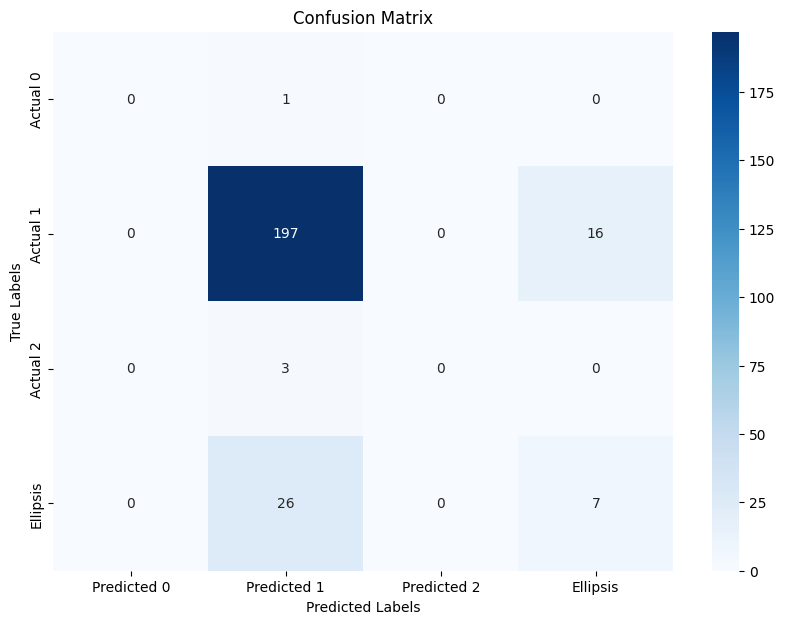

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true race labels (y_test) and predicted race labels (y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1', 'Actual 2', ...], columns=['Predicted 0', 'Predicted 1', 'Predicted 2', ...])

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [13]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'df'
# Analyze the frequency of each race category
race_counts = df['race'].value_counts()

# Get the race with the highest crime frequency
highest_crime_race = race_counts.idxmax()

# Display the race with the highest crime frequency
print("Race with the highest crime frequency:", highest_crime_race)


Race with the highest crime frequency: B


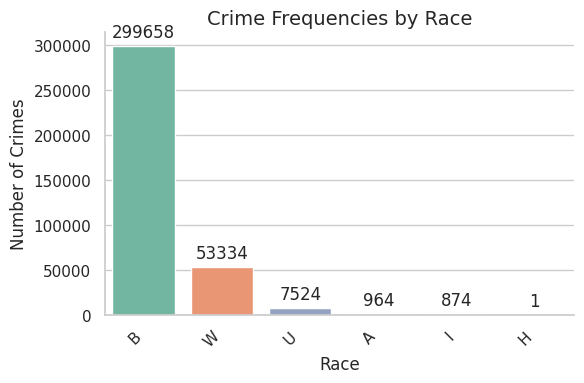

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable called 'df'
# Analyze the frequency of each race category
race_counts = df['race'].value_counts()

# Create a bar plot of race frequencies with enhanced aesthetics
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Set the style of the plot

# Customize the color palette
colors = sns.color_palette('Set2')[:len(race_counts)]

# Create the bar plot
ax = sns.barplot(x=race_counts.index, y=race_counts.values, palette=colors)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                 va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Customize the plot aesthetics
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.title('Crime Frequencies by Race', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'df'
# Analyze the frequency of charge descriptions for each race category
charge_by_race = df.groupby(['race', 'chargedescription']).size().reset_index(name='count')

# Find the charge description with the highest count for each race category
highest_charge_by_race = charge_by_race.groupby('race')['count'].idxmax()
highest_charge_descriptions = charge_by_race.loc[highest_charge_by_race]

# Display the charge descriptions highest by race
print(highest_charge_descriptions)


      race  chargedescription  count
255      A     Unknown Charge    111
6666     B  FAILURE TO APPEAR  31794
12042    H      CDS VIOLATION      1
12165    I  FAILURE TO APPEAR    120
13293    U     Unknown Charge    884
15098    W  FAILURE TO APPEAR   7777


Highest Charge Descriptions by Race

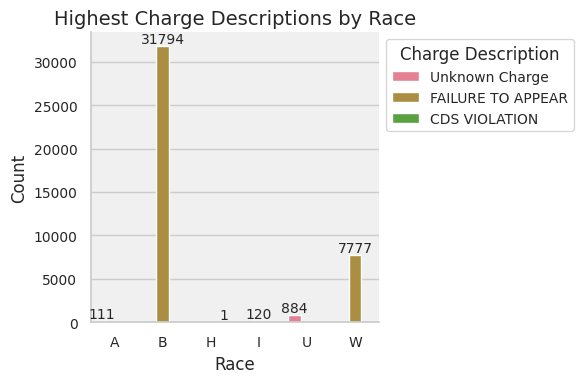

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable called 'df'
# Analyze the frequency of charge descriptions for each race category
charge_by_race = df.groupby(['race', 'chargedescription']).size().reset_index(name='count')

# Find the charge description with the highest count for each race category
highest_charge_by_race = charge_by_race.groupby('race')['count'].idxmax()
highest_charge_descriptions = charge_by_race.loc[highest_charge_by_race]

# Create a bar plot of the highest charge descriptions by race
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")  # Set the style of the plot
colors = sns.color_palette("husl", len(highest_charge_descriptions))

# Create the bar plot
ax = sns.barplot(x='race', y='count', hue='chargedescription', data=highest_charge_descriptions, palette=colors)

# Customize the plot aesthetics
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Highest Charge Descriptions by Race', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Charge Description', bbox_to_anchor=(1, 1), fontsize=10)
plt.tight_layout()

# Add a background color to the plot
ax.set_facecolor('#f0f0f0')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Remove the top and right spines
sns.despine()

# Display the plot
plt.show()


Charge Descriptions by Gender

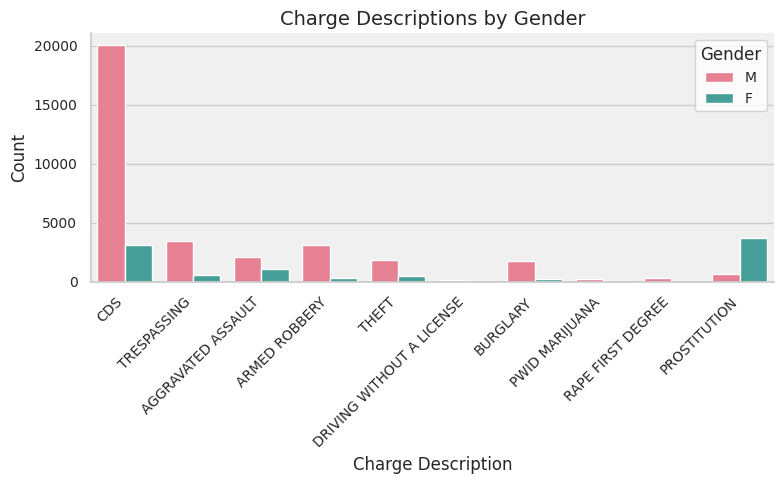

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable called 'df'
# Specify the charge descriptions of interest
charge_descriptions = [
    'AGGRAVATED ASSAULT',
    'DRIVING WITHOUT A LICENSE',
    'CDS',
    'BURGLARY',
    'THEFT',
    'PWID MARIJUANA',
    'TRESPASSING',
    'PROSTITUTION',
    'ARMED ROBBERY',
    'RAPE FIRST DEGREE'
]

# Filter the dataset based on the specified charge descriptions
filtered_df = df[df['chargedescription'].isin(charge_descriptions)]

# Create a bar plot to compare charge descriptions with age and gender
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.countplot(x='chargedescription', hue='gender', data=filtered_df, palette='husl')

# Customize the plot aesthetics
plt.xlabel('Charge Description', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Charge Descriptions by Gender', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()

# Add a background color to the plot
ax.set_facecolor('#f0f0f0')

# Remove the top and right spines
sns.despine()

# Display the plot
plt.show()


In [21]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'df'

# Create age ranges
age_ranges = [(10, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 100)]

# Initialize a dictionary to store the top charge descriptions for each age range
top_charge_descriptions_by_age_range = {}

# Iterate over each age range
for age_range in age_ranges:
    age_min, age_max = age_range
    
    # Filter the dataset based on the age range
    filtered_df = df[(df['age'] >= age_min) & (df['age'] <= age_max)]
    
    # Group the filtered dataset by charge description and calculate the counts
    charge_counts = filtered_df['chargedescription'].value_counts()
    
    # Get the top three charge descriptions for the current age range
    top_charge_descriptions = charge_counts.head(3).index.tolist()
    
    # Store the top charge descriptions in the dictionary
    top_charge_descriptions_by_age_range[age_range] = top_charge_descriptions

# Display the top charge descriptions for each age range
for age_range, charge_descriptions in top_charge_descriptions_by_age_range.items():
    age_min, age_max = age_range
    print(f"Age Range {age_min}-{age_max}:")
    for i, charge_description in enumerate(charge_descriptions):
        print(f"{i+1}. {charge_description}")
    print()


Age Range 10-20:
1. CDS VIOLATION
2. Unknown Charge
3. CDS

Age Range 21-30:
1. FAILURE TO APPEAR
2. Unknown Charge
3. CDS VIOLATION

Age Range 31-40:
1. FAILURE TO APPEAR
2. ASSAULT-SEC DEGREE
3. Unknown Charge

Age Range 41-50:
1. FAILURE TO APPEAR
2. CDS VIOLATION
3. Unknown Charge

Age Range 51-60:
1. FAILURE TO APPEAR
2. CDS VIOLATION
3. CDS

Age Range 61-100:
1. FAILURE TO APPEAR
2. CDS VIOLATION
3. ASSAULT-SEC DEGREE



Age_Range vs Charge_description

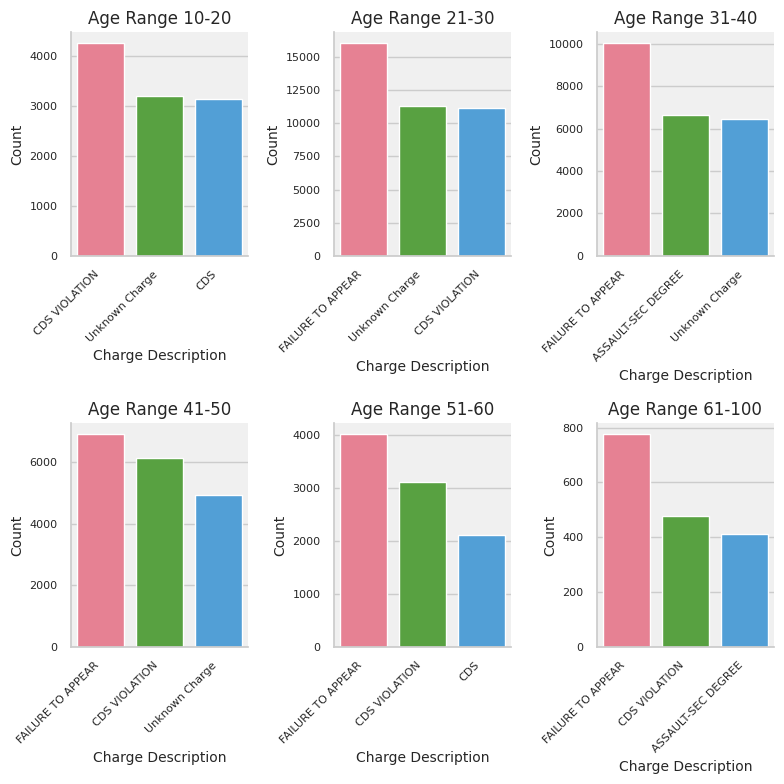

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable called 'df'

# Create age ranges
age_ranges = [(10, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 100)]

# Initialize a dictionary to store the top charge descriptions for each age range
top_charge_descriptions_by_age_range = {}

# Iterate over each age range
for age_range in age_ranges:
    age_min, age_max = age_range
    
    # Filter the dataset based on the age range
    filtered_df = df[(df['age'] >= age_min) & (df['age'] <= age_max)]
    
    # Group the filtered dataset by charge description and calculate the counts
    charge_counts = filtered_df['chargedescription'].value_counts()
    
    # Get the top three charge descriptions for the current age range
    top_charge_descriptions = charge_counts.head(3).index.tolist()
    
    # Store the top charge descriptions in the dictionary
    top_charge_descriptions_by_age_range[age_range] = top_charge_descriptions

# Create bar plots for each age range
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")  # Set the style of the plot

for i, age_range in enumerate(top_charge_descriptions_by_age_range.keys()):
    age_min, age_max = age_range
    charge_descriptions = top_charge_descriptions_by_age_range[age_range]
    
    # Create a subplot for each age range
    ax = plt.subplot(2, 3, i+1)
    
    # Get the filtered dataset for the current age range
    filtered_df = df[(df['age'] >= age_min) & (df['age'] <= age_max)]
    
    # Filter the dataset based on the top charge descriptions
    filtered_df = filtered_df[filtered_df['chargedescription'].isin(charge_descriptions)]
    
    # Create the bar plot
    sns.countplot(x='chargedescription', data=filtered_df, order=charge_descriptions, palette='husl', ax=ax)
    
    # Customize the plot aesthetics
    plt.xlabel('Charge Description', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title(f'Age Range {age_min}-{age_max}', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    
    # Add a background color to the plot
    ax.set_facecolor('#f0f0f0')

    # Remove the top and right spines
    sns.despine()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [30]:
df.columns

Index(['arrestnumber', 'age', 'gender', 'race', 'arrestdatetime',
       'arrestlocation', 'incidentoffence', 'incidentlocation', 'charge',
       'chargedescription', 'district', 'post', 'neighborhood', 'latitude',
       'longitude', 'geolocation', 'incidentnumber', 'objectid', 'age_range'],
      dtype='object')

baltimore_map


In [36]:
import folium
import pandas as pd


# Group the dataset by neighborhood and calculate the crime rates
neighborhood_crime_rates = df['neighborhood'].value_counts(normalize=True)

# Create a new DataFrame to store neighborhood crime rates
neighborhood_data = pd.DataFrame({'Neighborhood': neighborhood_crime_rates.index, 'Crime Rate': neighborhood_crime_rates.values})

# Sort the neighborhoods by crime rate in descending order
sorted_neighborhoods = neighborhood_data.sort_values('Crime Rate', ascending=False)

# Get the top 5 neighborhoods with the highest crime rates
top_5_neighborhoods = sorted_neighborhoods.head(5)

# Load the Baltimore city map with smaller width
baltimore_map = folium.Map(location=[39.29, -76.61], zoom_start=12, width=500)

# Add markers and labels for each neighborhood with crime rate information
for index, row in neighborhood_data.iterrows():
    neighborhood = row['Neighborhood']
    crime_rate = row['Crime Rate']
    
    # Get the latitude and longitude for the neighborhood
    latitude = df.loc[df['neighborhood'] == neighborhood, 'latitude'].iloc[0]
    longitude = df.loc[df['neighborhood'] == neighborhood, 'longitude'].iloc[0]
    
    # Create a marker with crime rate as a popup
    marker_color = 'red' if neighborhood in top_5_neighborhoods['Neighborhood'].values else 'blue'
    marker = folium.Marker(location=[latitude, longitude], popup=f"Neighborhood: {neighborhood}<br>Crime Rate: {crime_rate:.2%}", icon=folium.Icon(color=marker_color))
    marker.add_to(baltimore_map)
    
    # Add labels to the top neighborhoods
    if neighborhood in top_5_neighborhoods['Neighborhood'].values:
        label = folium.map.Marker([latitude, longitude], icon=folium.DivIcon(icon_size=(150,36), icon_anchor=(0,0),
                            html=f'<div style="font-size: 12pt">{neighborhood}</div>'))
        label.add_to(baltimore_map)

# Display the map
baltimore_map
